In [1]:
from nose.tools import assert_equal

## Assignment 1


# Task 1
***
Implement a function `phonetics` that converts each character in a given string into its corresponding phonetic-alphabet representation. The function should support different phonetic alphabets (the NATO phonetic alphabet is provided for testing purposes) while keeping non-alphabetic characters (such as `@`, `#`, etc.) unchanged. Additionally, you must convert digits based on the first letter of the word that represents the number (e.g., `1` becomes "Oscar" for "One").

Example: execution of `phonetics('ban@na1', nato_phonetics)` should result in the following output: `['Bravo', 'Alpha', 'November', '@', 'November', 'Alpha', 'Oscar']`

Hints:
- Your function will be tested with different input phonetic-alphabet mappings of different languages (e.g., German, French)!
- All phonetic-alphabet mappings are guaranteed to have26 entries and one entry per alphabetic character.
- Digits are always mapped to their English pronounciation, whatever the phonetic alphabet being used otherwise.

In [3]:
nato = ['Alpha', 'Bravo', 'Charlie', 'Delta', 'Echo', 'Foxtrot', 'Golf', 'Hotel', 'India', 'Juliett', 'Kilo', 'Lima',
        'Mike', 'November', 'Oscar', 'Papa', 'Quebec', 'Romeo', 'Sierra', 'Tango', 'Uniform', 'Victor', 'Whiskey',
        'X-ray', 'Yankee', 'Zulu']
digits = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

def phonetics(input_string, phonetic_alphabet):
    if (type(input_string) != str) or (type(phonetic_alphabet) != list):
        return("Wrong input type")

    listed_text = list(input_string)# transforms the string into a list of strings
    first_letters = [word[0] for word in phonetic_alphabet] # list of all the first letters
    output_list = []
    
    #ittarates every item in list listed_text
    for item in listed_text:
        # if item in Listed_text also happens to be in first_letters
        if item.upper() in first_letters:
            #we store the index of the item from first_letters
            index = first_letters.index(item.upper())
            # then add it to the output list
            output_list.append(phonetic_alphabet[index])
        elif item.isdigit():
            index = int(item)
            output_list.append(digits[index]) 
        else:
            # if we don't have this item in the list, we just store it as it is
            output_list.append(item)
    return output_list
        
    
    
phonetics('test 我 ü.', nato)

['Tango', 'Echo', 'Sierra', 'Tango', ' ', '我', ' ', 'ü', '.']

In [4]:
assert_equal(type(phonetics('bananas@12', nato)), list, msg = "Test 1.0")
assert_equal(len(phonetics('Welcome!to ds2024', nato)), 17, msg = "Test 1.1")
assert_equal(phonetics(' #', nato), [' ', '#'], msg = "Test 1.2")
assert_equal(phonetics('', nato), [], msg = "Test 1.3")
assert_equal(phonetics('test 我 ü.', nato), ['Tango', 'Echo', 'Sierra', 'Tango', ' ', '我', ' ', 'ü', '.'], msg = "Test 1.4")
assert_equal(phonetics(2024, nato), "Wrong input type", msg = "Test 1.5")
assert_equal(phonetics('all good', "alpha beta gamma"), "Wrong input type", msg = "Test 1.6")

# Task 2
***
The following program printout was created using the Blockly visual programming environment. Implement a function `compute(n)` that checks whether an integer `n` is a palindrome. Implement a Python program (function) corresponding exactly to the Blockly one.
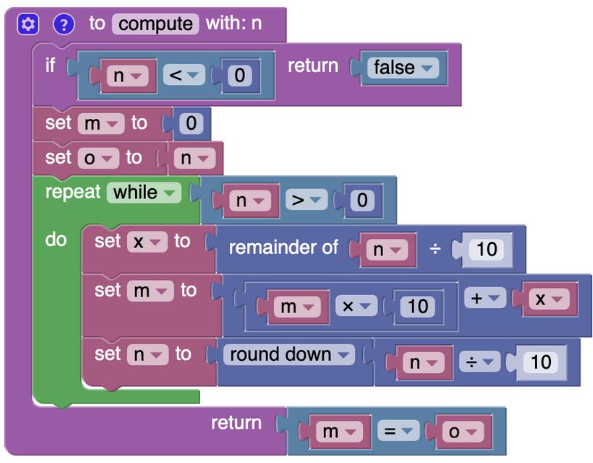

Hints:
* This Blockly program was also featured in the entry exam.
* Mind the importance of precedence of nested terms in Blocky arithmetic expressions.
* You need to handle attempts of providing a non-integer value as an input to `compute()`. Return the string `Wrong input type`. Note: Other then that, try to make an exacty translation from the Blockly code to Python code.

In [6]:
def compute(n):
    if type(n) != int:
        return ("Wrong input type")
    if n < 0:
        return False
    m = 0
    o = n
    while n > 0:
        x = n%10
        m = m * 10 + x
        n = n//10
    return m == o


In [7]:
assert_equal(compute(1), True, msg = "Test 2.0")
assert_equal(type(compute(123321)), bool, msg = "Test 2.1")
assert_equal(compute(934439), True, msg = "Test 2.2")
assert_equal(compute("pipenv install hacks"), "Wrong input type", msg = "Test 2.3")
assert_equal(compute(123), False, msg = "Test 2.4")
assert_equal(compute(823498), False, msg = "Test 2.5")

# Task 3
***

Write a function `sort_by_even_first` that takes a list of integers and returns a new list where all even numbers come first (in ascending order), followed by all odd numbers (also in ascending order). However, if no even numbers are present, you should sort the odd numbers in descending order.

The function should handle incorrect input types by returning the string `Wrong input type` if the input is not a list or contains non-integer elements.

If the list contains no numbers, return an empty list.

*Important*: Do not use built-in sorting Python functions: `sorted`.  Rather, implement a naive sorting procedure, a bubble sort. Below, you find a errorneous and incomplete implementation of bubble sort. Correct the defects, complete the implementation, and use it as part of your solution:

```
def bubble_sort(x, reverse=False): # bubble sort with both ascending and descending
        n = len(x)
        for i in range(n):
            for j in range(0, n - i - 2):
                if (x[j] > x[j + 1]) or (x[j] < x[j + 1]):
                    x[j], x[j + 1] = x[j], x[j + 1]
        return x
```

Example 1:

Input: `[5, 3, 8, 2, 1, 4]`

Output: `[2, 4, 8, 1, 3, 5]`

Example 2:

Input: `[7, 9, 5]`

Output: `[9,7,5]` (as no even numbers are present)

In [9]:
def sort_by_even_first(input_list):
    if type(input_list) != list:    #if its not a list
        return("Wrong input type")
    
    if not input_list:              #if list is empty
        return []
    
    odd_list = []
    even_list = []
    
    for i in input_list:            # separating even and odd numbers
        if i%2 == 0:
            even_list.append(i)
        elif i%2 != 0:
            odd_list.append(i)
            
    if even_list:                   # if there is a list, we sort it
        bubble_sort(even_list, reverse = False)
        bubble_sort(odd_list, reverse = False)     
    else:                           # if there is none, we sort odd list only 
        bubble_sort(odd_list, reverse = True)
    
    output = even_list + odd_list
    return output
        

    
def bubble_sort(x, reverse = False): # bubble sort with both ascending and descending
        n = len(x)
        for i in range(n):
            swapped = False          # we need it to avoid unnecessary ittaration, if the list is sorted already, or its partia;y sorted
            for j in range(0, n - i - 1):
                if (x[j] > x[j + 1]) and (reverse == False): #ascending order
                    x[j], x[j + 1] = x[j+1], x[j]
                    swapped = True
                if (x[j] < x[j + 1]) and (reverse == True):  #descending order
                    x[j], x[j + 1] = x[j+1], x[j]
                    swapped = True
            if swapped == False:
                break
        return x
    
my_list = [4,2,87,12,5,1]
bubble_sort(my_list, reverse = False)
sort_by_even_first(my_list)

[2, 4, 12, 1, 5, 87]

In [10]:
assert_equal(sort_by_even_first([1,2,3]), [2, 1, 3], msg = "Test 3.0")
assert_equal(sort_by_even_first([1,3,7,555555]), [555555, 7, 3, 1], msg = "Test 3.1")
assert_equal(sort_by_even_first(1), "Wrong input type", msg = "Test 3.2")
assert_equal(sort_by_even_first([1]), [1], msg = "Test 3.3")
assert_equal(sort_by_even_first([]), [], msg = "Test 3.4")

## Task 4 ##
***
The function `describe` is given an arbitrarily nested Python object consisting of dictionaries, lists, integers and strings. The goal is to traverse the given Python object and extract the following values to be returned as a tuple.

- Tuple element 1: Largest integer value. (If no integer is present, return 0 as the largest integer.)
- Tuple element 2: Longest string (both dictionary keys and values are to be considered!) (If no string is present, return the empty string "" as the longest string.)
- Tuple element 3: Maximum depth of the Python object (A default value is given as input.)

The function must only consider these four types of Python values: `str`, `int`, `list`, and `dict`.

Hints:

1. You do not need to transform any values. "123" counts as a string and does not need to be transformed, e.g.
2. Dictionary keys also count towards the longest string or largest integer.
3. Each time you encounter a dictionary or list, you increase the depth by 1. Conversely, if you step out of a list or dictionary instance, you decrease the depth by 1.

Hints:
* Use recursion to tackle this task.
* Make sure to process all levels of the nested Python object.
* You can expect to be only given lists and dictionaries; there is no need to check for inputs (in this sporadic case)

In [12]:
a = {"key1": ["asd", 12], "key2": [{"key3":"asdfg", "key4":[{"key5":[11]}]}]}
b = {"a":[], "12":[], "123":[[{" ":"     "}]]}

In [13]:

def describe(a, depth = 0):
    if (type(a) != int) and (type(a) != str) and (type(a) != list) and (type(a) != dict):
        return("Wrong input type")
    max_int = 0
    max_str = ""
    max_depth = depth
    if type(a) is dict:
        for key, value in a.items():                              # for every key and value in the dictionary 
            if (type(key) is int) and (key > max_int):            # basically max function for integers
                max_int = key
            if (type(key) is str) and (len(key) > len(max_str)):  # finding the string with biggest length
                max_str = key
                
            current_value = describe(value, depth + 1)            # recursive finding the max values, by repeating the function describe all over again
            if current_value[0] > max_int:
                max_int = current_value[0]
            if len(current_value[1]) > len(max_str):
                max_str = current_value[1]
            if current_value[2] > max_depth:                      # every pass +1
                max_depth = current_value[2]
                
    elif type(a) is list:                                         # doing the same for the list
        for i in a:
            current_value = describe(i, depth + 1)                # calling the function, interrogating values, until there is no more lists in the list/dictionaries
            if current_value[0] > max_int:
                max_int = current_value[0]
            if len(current_value[1]) > len(max_str):
                max_str = current_value[1]
            if current_value[2] > max_depth:
                max_depth = current_value[2]
        
        
    elif type(a) is int:                                           # we dont need recursion for 1 value
        if a > max_int:
            max_int = a
    elif type(a) is str:
        if len(a) > len(max_str):
            max_str = a
    
    output = (max_int, max_str, max_depth)
    return output


In [14]:
assert_equal(type(describe(a)), tuple, msg = "Test 4.0: Make sure you get the right output type")
assert_equal(type((describe(a)[0])), int, msg = "Test 4.1: Make sure your output follows the rules")
assert_equal(describe(a)[0], 12, msg = "Test 4.2")
assert_equal(describe(a)[1], 'asdfg', msg = "Test 4.3")
assert_equal(describe(a)[2], 6, msg = "Test 4.4")
assert_equal(describe(float(12)), "Wrong input type", msg = "Test 4.5")
assert_equal(describe({"k1": [321]}), (321, "k1", 2), msg = "Test 4.6")

### Task 5
***
Implement a function `autodecode`, which allows decoding a string representing an encoded English text using a character-substitution algorithm based on character shifting. Decoding works even without knowing the originally used shift value but might fail to produce a readable and useful text. `autodecode` takes the following input parameters:

- `word` (data type: `str`): This will be the encoded text you must decode.
- `special` (`str`): This character is going to determine which special characters will be replaced by a whitespace (" ")
- `vowel_list` (`list`): A list of characters from the alphabet most frequently found in the language of the original text.   It will help you decode the (encoded) text.
- `search_term` (`str`): This sentinel term will determine whether you found a correct decoding, which is readable text and contain the value of `search_term`.

If arguments passed into `autodecode` do not match the data types, return the error message: `Wrong input type`. If no solutions are found, your code should return: `No valid decoding found`.

Here is how you should be able to find out the correct decoding in three steps:

1. Cleaning:
    - The encoding only works with lowercase letters, so make sure all letters are lowercase.
    - Get rid of the special character and replace it with white spaces.
    - Clean the text by removing anything that is not a letter or white space.
2. Find the most frequent letter:
    - Find the most common letter in your encoded text.
    - This will be the key to determining the shift values you should consider.
    - You iterate over the vowel list with the most common letter and determine the possible shift values.
3. Guess the shift value using character frequencies:
    - Texts written in the known alphabet are known to contain specific characters (e.g., vowels) more often than others. Therefore, characters of the encoded text might contain equally frequently shifted characters.
    - To guess the shift value, in this task, you can assume that the most common letter in the correctly decoded text is one of the vowels. In turn, you are computing the shift values for each most common letter. This means you will use the most common letter in the encoded text and calculate two shift values (one backward, one forward) to turn the most common letter into each vowel.
    - Example: `qmwwmmrk` has `m` as the most common letter. To shift from `m` to `e` (the first candidate vowel in the list below), one can either shift by 18 (backward) or 8 (forward).
    - Remember the alphabet has 26 letters, and thus, shifting 1 character forward from `z` leads to `a`. (You can use the modulo operator to account for these borders!)
    - With a pair of backward and forward shifts calculated, you compute a possible decoding solution (one for each vowel).
    - The `search_term` will indicate whether a given solution represents the readable and useful original text.
4. Return the correct solution, if any. If no proper solution is found, your code should return: `No valid decoding found`.
   
Hints:
- Use the asserts below to check if your code does what is requested.
- Focus on one step at a time.
- Create an intermediate or helper functions for each step: 1) cleaning, 2) finding the most common letter, 3) decoding.

In [16]:
vowels = ["e","a","i"]

In [17]:
def autodecode(word, special, vowel_list, search_term):
    if (type(word) != str) or (type(special) != str) or (type(vowel_list) != list) or (type(search_term) != str):
        return("Wrong input type")
    word = word.lower()
    word = word.replace(special, " ")
    word_clean = list(word)     # turning each charecter into item in a list for easier iterrogation 
    
    # Finding most common letter
    letter_count = {}
    for char in word_clean:
        if ('a' <= char <= 'z') or (char == ' '):  # Only consider alphabetic characters
            if char not in letter_count:
                letter_count[char] = 1
            else:
                letter_count[char] += 1
        

    common_letter = ''
    max_counter = 0
    
    for letter, count in letter_count.items():
        if count > max_counter:
            max_counter = count
            common_letter = letter

    if (max_counter <= 2):                      # Dont really get why "rovvy+dohd!" == "heelo text" isnt sufficient enough, is it because there is 3 different characters that repeat only 2 times?
        return "No valid decoding found"          
    
    possible_solution = []
    for v in vowel_list:
        shift_forward = (ord(v) - ord(common_letter))%26       #calculating how many positions we need to move character in the alphabet
        shift_backward = (ord(common_letter) - ord(v))%26
        
        decode_forward = []
        for letter in word_clean:
            if 'a' <= letter <= 'z':
                new_letter = chr((ord(letter) - ord('a') + shift_forward) % 26 + ord('a')) # - ord(a) defines the position in alphabet, %26 ensures that we are not going beyond 26 letters in the alphabet
                decode_forward.append(new_letter)
            elif letter == ' ':
                decode_forward.append(letter)                          #keeps spaces in the text unchenged
        decode_forward = "".join(decode_forward)                       #Tutorium: join statement is used to connect a string with a specified element
        return decode_forward
    
        decode_backward = []
        for letter in word_clean:
            if 'a' <= letter <= 'z':
                new_letter = chr((ord(letter) - ord('a') - shift_backward) % 26 + ord('a')) # - ord(a) defines the position in alphabet, %26 ensures that we are not going beyond 26 letters in the alphabet
                decode_backward.append(new_letter)
            elif letter == ' ':
                decode_backward.append(letter) 
        decode_backward = "".join(decode_backward)


        if search_term in decode_forward:
            possible_solution.append(decode_forward)
        if search_term in decode_backward:
            possible_solution.append(decode_backward)
    
    if possible_solution:
        return possible_solution[0]                                # Return the first found solution
    else:
        return ("No valid decoding found")
        

In [18]:
assert_equal(autodecode(123, "+", vowels, "lmao"), "Wrong input type", msg = "Test 5.0")
assert_equal(autodecode("123", 2, vowels, "lmao"), "Wrong input type", msg = "Test 5.1")
assert_equal(autodecode("123", "+", {"Balenciaga": "Hugo Boss"}, "lmao"), "Wrong input type", msg = "Test 5.2")
assert_equal(autodecode("123", "+", vowels, 2), "Wrong input type",  msg = "Test 5.3")
assert_equal(autodecode("rovvy+dohd!", "+", vowels, "text"), "No valid decoding found",  msg = "Test 5.4")
assert_equal(autodecode("rooooovvy+dohd!", "+", vowels, "text"), "heeeeello text",  msg = "Test 5.5")
assert_equal(autodecode("+++", "+", vowels, " "), "   ",  msg = "Test 5.6")